In [1]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
excel_file = pd.ExcelFile('School Profile 2008-2024.xlsx')
print(excel_file.sheet_names)

['DataDictionary', 'SchoolProfile 2008-2024']


In [2]:
data = pd.read_excel(excel_file, sheet_name='SchoolProfile 2008-2024')

In [3]:
# clean the data
data.columns = data.columns.str.strip().str.lower()
data.columns = data.columns.str.replace(r'\s*\(.*\)', '', regex=True)
data.columns = data.columns.str.replace(r'\s+', '_', regex=True)

In [19]:
data.sample(2)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164097 entries, 0 to 164096
Data columns (total 35 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   calendar_year                                        164097 non-null  int64  
 1   acara_sml_id                                         164097 non-null  int64  
 2   location_age_id                                      159838 non-null  float64
 3   school_age_id                                        160147 non-null  float64
 4   school_name                                          164097 non-null  object 
 5   suburb                                               164097 non-null  object 
 6   state                                                164097 non-null  object 
 7   postcode                                             164097 non-null  object 
 8   school_sector                                        1

In [18]:
# look for categories that we can examine further
for col in data.columns:
    n_unique = data[col].nunique(dropna=True)
    if n_unique < 20:
        print(f"{col}: {n_unique} unique values")
        print(data[col].unique())
        print("-" * 40)

calendar_year: 17 unique values
[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011
 2010 2009 2008]
----------------------------------------
state: 8 unique values
['TAS' 'SA' 'WA' 'NSW' 'QLD' 'ACT' 'NT' 'VIC']
----------------------------------------
school_sector: 3 unique values
['Catholic' 'Independent' 'Government']
----------------------------------------
school_type: 4 unique values
['Primary' 'Combined' nan 'Secondary' 'Special']
----------------------------------------
campus_type: 2 unique values
['School Single Entity' 'School Head Campus']
----------------------------------------
rolled_reporting_description: 2 unique values
['Individual Reporting' 'Rolled Reporting']
----------------------------------------
geolocation: 5 unique values
['Inner Regional' 'Outer Regional' 'Remote' 'Very Remote' 'Major Cities']
----------------------------------------


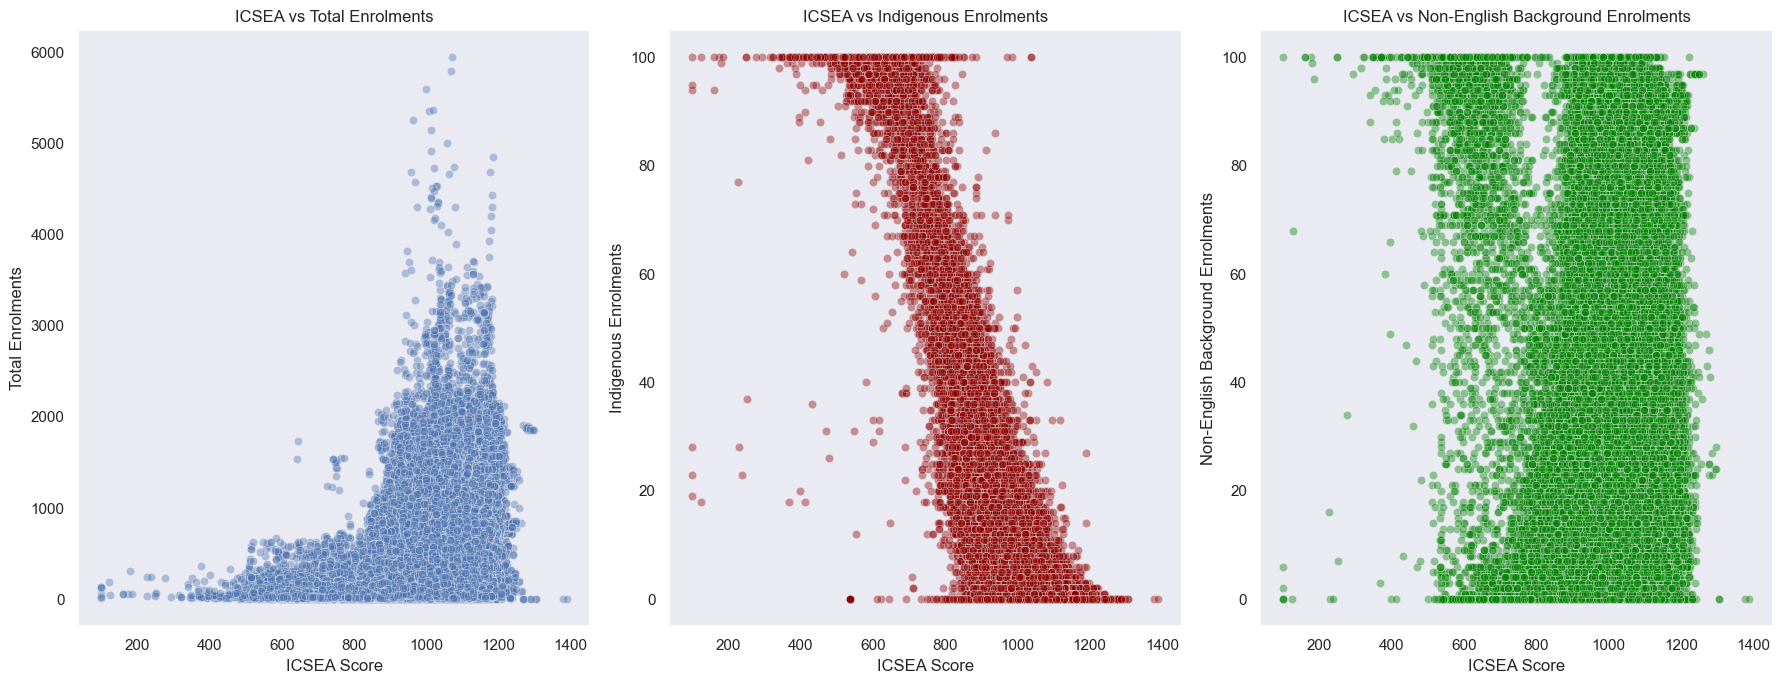

In [37]:
# let's explore correlations between privelge and factors: ISCEA == Privelege Score
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
sns.set_style("dark")

# ICSEA vs total enrolments
sns.scatterplot(data=data, x='icsea', y='total_enrolments', ax=axes[0], alpha=0.4)
axes[0].set_title("ICSEA vs Total Enrolments")
axes[0].set_xlabel("ICSEA Score")
axes[0].set_ylabel("Total Enrolments")

# ICSEA vs indigenous enrolments
sns.scatterplot(data=data, x='icsea', y='indigenous_enrolments', ax=axes[1], alpha=0.4, color='darkred')
axes[1].set_title("ICSEA vs Indigenous Enrolments")
axes[1].set_xlabel("ICSEA Score")
axes[1].set_ylabel("Indigenous Enrolments")

# ICSEA vs LBOTE
sns.scatterplot(data=data, x='icsea', y='language_background_other_than_english_-_yes', ax=axes[2], alpha=0.4, color='green')
axes[2].set_title("ICSEA vs Non-English Background Enrolments")
axes[2].set_xlabel("ICSEA Score")
axes[2].set_ylabel("Non-English Background Enrolments")

plt.tight_layout()
plt.show()


## Key Takeaways: Socio-Educational Advantage Correlations

These scatterplots reveal important relationships between school advantage (ICSEA) and enrollment patterns:

- **No strong correlation between ICSEA and total enrollments**, suggesting socio-economic advantage doesn't necessarily predict school size
- **Negative relationship between ICSEA and Indigenous enrollments**, with higher-advantage schools showing consistently lower Indigenous student numbers
- **Complex pattern with non-English background enrollments**, where both very low and very high ICSEA schools may have higher LBOTE percentages

These patterns highlight how socio-educational advantage intersects with demographic representation in Australian schools, with particular implications for Indigenous education access across the socioeconomic spectrum.

In [40]:
# let's look at school sector and ICSEA
avg_icsea_by_sector = data.groupby('school_sector')['icsea'].mean().sort_values(ascending=False)
print(avg_icsea_by_sector)


school_sector
Independent    1056.523709
Catholic       1038.558592
Government      982.493334
Name: icsea, dtype: float64


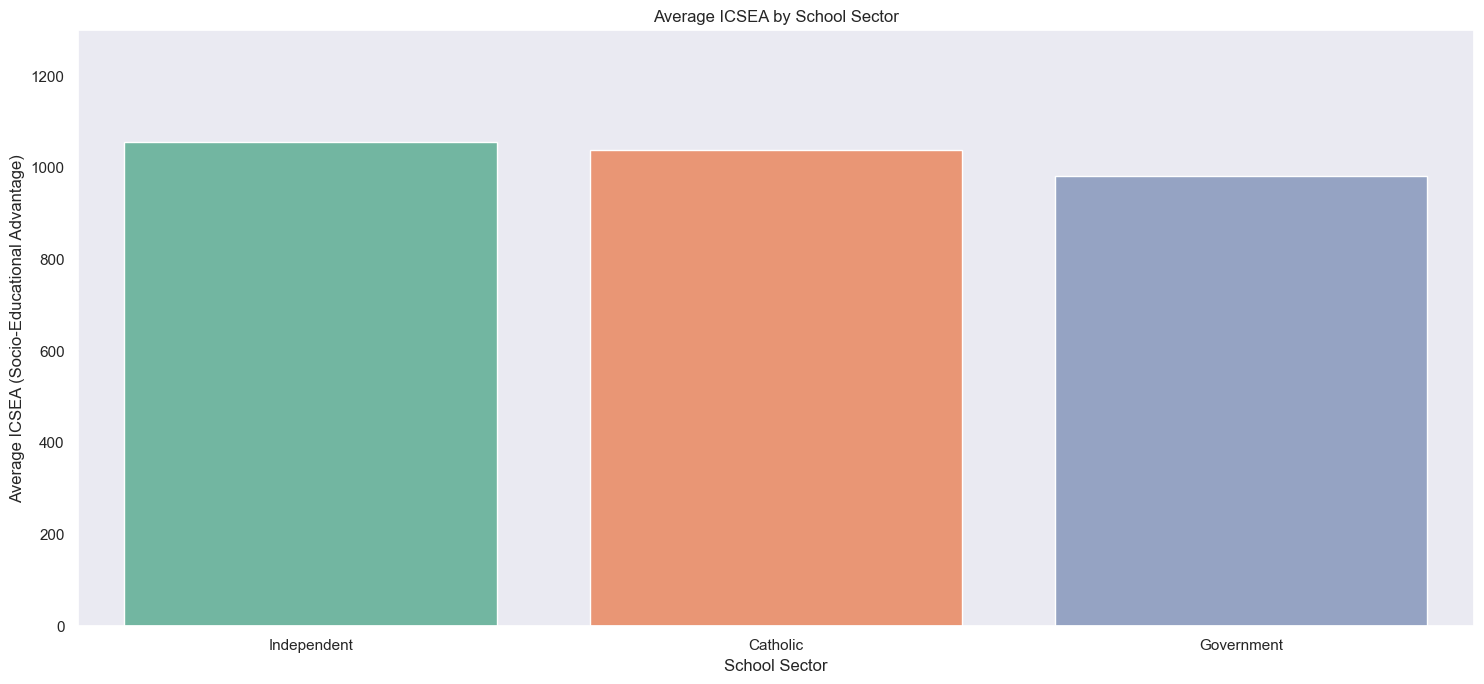

In [50]:
plt.figure(figsize=(15,7))
sns.barplot(
    x=avg_icsea_by_sector.index, 
    y=avg_icsea_by_sector.values, 
    palette='Set2', 
    hue=avg_icsea_by_sector.index
)
plt.title('Average ICSEA by School Sector')
plt.xlabel('School Sector')
plt.ylabel('Average ICSEA (Socio-Educational Advantage)')
plt.ylim(0, 1300) 
plt.tight_layout()
plt.show()


## Key Takeaways: School Sector and Socio-Educational Advantage

The bar chart comparing average ICSEA scores across school sectors reveals a clear hierarchy in socio-educational advantage:

- **Independent schools** maintain the highest average ICSEA scores, suggesting they serve communities with greater educational advantage
- **Catholic schools** occupy the middle position, with ICSEA scores above the national average but below independent schools
- **Government schools** show the lowest average ICSEA scores, indicating they serve a broader cross-section of communities including those with less socio-educational advantage

This visualization highlights how school sector correlates with socioeconomic factors in the Australian education system, raising questions about educational equity and resource distribution across different school types.

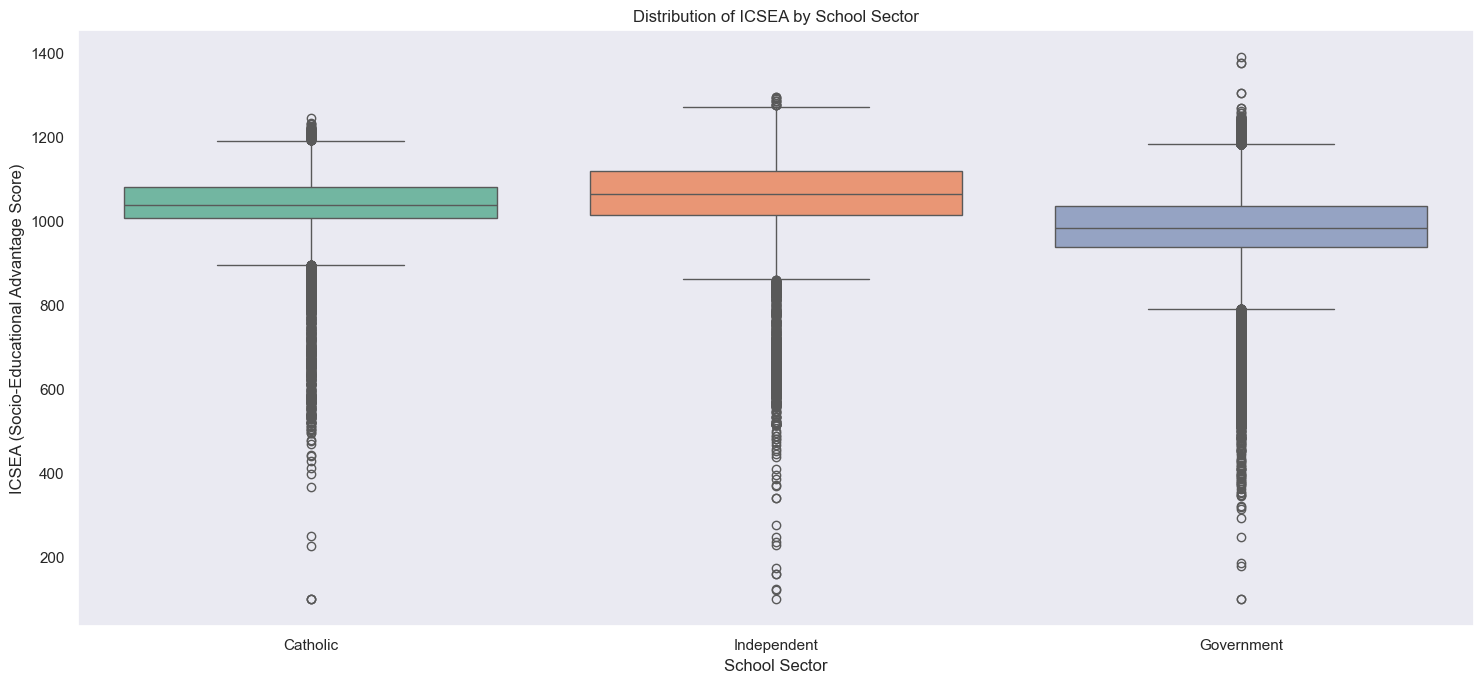

In [59]:
# not really getting a good idea - -try boxplot
plt.figure(figsize=(15,7))
sns.boxplot(
    data=data,
    x='school_sector',
    y='icsea',
    palette='Set2',
    showfliers=True,
    hue='school_sector'
)
plt.title('Distribution of ICSEA by School Sector')
plt.xlabel('School Sector')
plt.ylabel('ICSEA (Socio-Educational Advantage Score)')
#plt.ylim(0, 1300)  # Adjust as needed
plt.tight_layout()
plt.show()

## Key Takeaways: ICSEA Distribution Across School Sectors

The boxplot provides deeper insight into the distribution of socio-educational advantage scores:

- **Wide range within each sector**, indicating significant variation in the communities served by each school type
- **Government schools show the broadest distribution**, serving communities across the socioeconomic spectrum but with lower median ICSEA
- **Independent schools have the highest median** and fewer schools at the lower end of the ICSEA scale
- **Notable outliers** in all sectors, particularly among government schools

This visualization demonstrates that while averages show clear patterns, there is considerable overlap between sectors, with some government schools serving high-advantage communities and some independent schools serving less-advantaged populations.

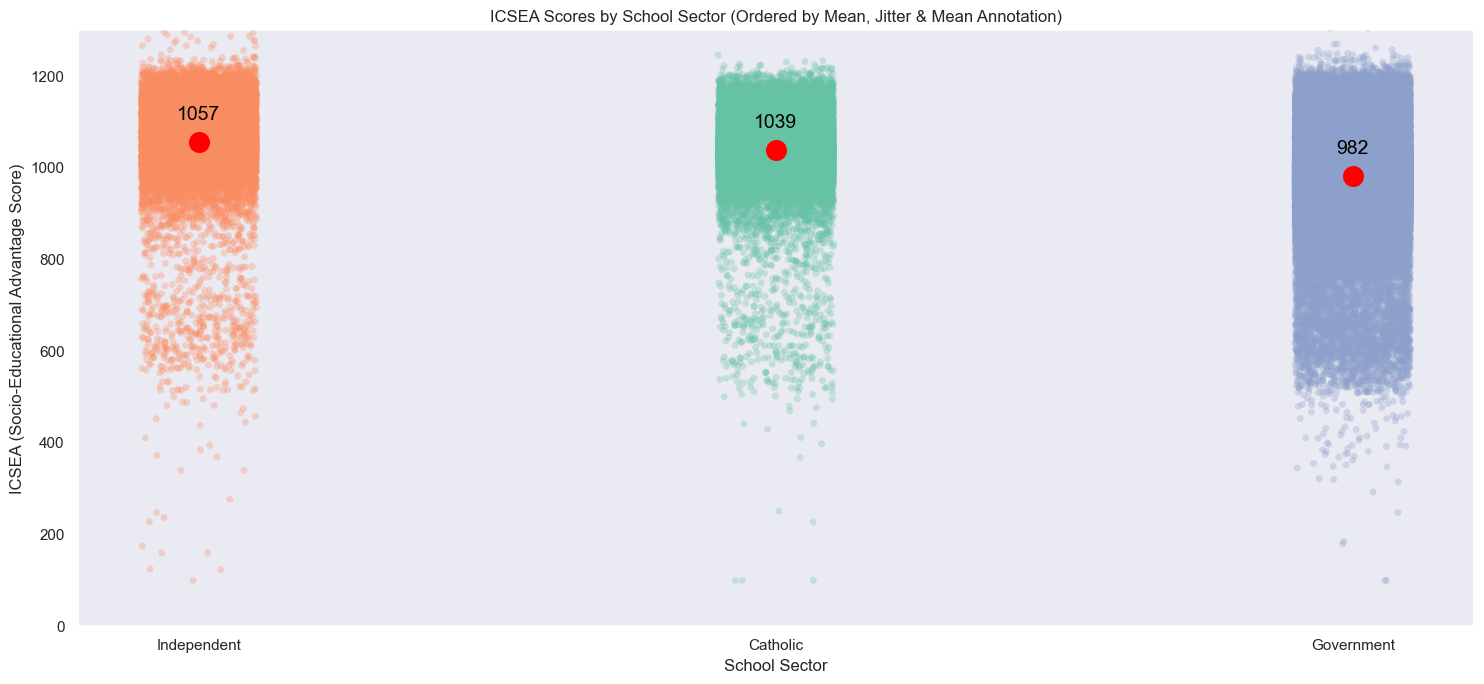

In [75]:
# still not, let's try a jitter plot
plt.figure(figsize=(15,7))
means = data.groupby('school_sector')['icsea'].mean().sort_values(ascending=False)
ordered_sectors = means.index.tolist()

sns.stripplot(
    data=data,
    x='school_sector',
    y='icsea',
    order=ordered_sectors,    # Use the sorted order here
    jitter=True,
    alpha=0.3,
    palette='Set2',
    hue='school_sector',
)

# 3. Add big red dots and labels for mean
for i, (sector, mean_val) in enumerate(means.items()):
    plt.scatter(i, mean_val, color='red', s=200, zorder=10)
    plt.text(
        i, mean_val + 40,
        f"{mean_val:.0f}",
        ha='center', va='bottom', fontsize=14, color='black',
    )

plt.title('ICSEA Scores by School Sector (Ordered by Mean, Jitter & Mean Annotation)')
plt.xlabel('School Sector')
plt.ylabel('ICSEA (Socio-Educational Advantage Score)')
plt.ylim(0, 1300)
plt.tight_layout()
plt.show()


## Key Takeaways: Individual School Distribution by Sector

The jitter plot with mean indicators provides the most comprehensive view of ICSEA distribution:

- **Clear separation of means** (red dots) confirms the sector-based advantage hierarchy, with approximately 100-point gaps between sectors
- **Dense clustering patterns** reveal where most schools within each sector fall on the ICSEA spectrum
- **Significant overlap zones** show where sectors compete for similar demographic groups
- **Thin representation at extremes**, particularly for very high ICSEA government schools and very low ICSEA independent schools

This visualization effectively shows both the statistical trends and individual school positions, highlighting that while sector patterns exist, individual schools can deviate substantially from their sector average.

## Summary: Educational Advantage Across Australian Schools

Our analysis reveals several important patterns in socio-educational advantage across Australian schools:

1. **Sector-based stratification** is evident, with independent schools serving higher-advantage communities on average
2. **Indigenous enrollment** shows a strong negative correlation with ICSEA scores
3. **Considerable variation exists within sectors**, with some government schools having higher ICSEA scores than some independent schools
4. **Mean differences are substantial** (approximately 100 points between sectors) but distributions overlap significantly

These findings raise important questions about educational equity, resource allocation, and how school choice operates across different socioeconomic groups in Australia.